In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('clean_calls.csv')

In [3]:
import seaborn as sns
sns.set_style('whitegrid')

In [4]:
df.head()

,lat,lng,zip,timeStamp,Fire,Traffic
0,40.297876,-75.581294,19525.000000,2015-12-10 17:40:00,0,0
1,40.258061,-75.264680,19446.000000,2015-12-10 17:40:00,0,0
2,40.121182,-75.351975,19401.000000,2015-12-10 17:40:00,1,0
3,40.116153,-75.343513,19401.000000,2015-12-10 17:40:01,0,0
4,40.251492,-75.603350,19237.658298,2015-12-10 17:40:01,0,0


In [5]:
#timeStamp to datetime
df['timeStamp'] = df['timeStamp'].apply(pd.to_datetime)

In [6]:
#Make some new columns based off of hour,month,dayofweek
df['Hour'] = df['timeStamp'].apply(lambda dtime: dtime.hour)
df['Month'] = df['timeStamp'].apply(lambda dtime: dtime.month)
df['DayofWeek'] = df['timeStamp'].apply(lambda dtime: dtime.dayofweek)

In [7]:
df.head()

,lat,lng,zip,timeStamp,Fire,Traffic,Hour,Month,DayofWeek
0,40.297876,-75.581294,19525.000000,2015-12-10 17:40:00,0,0,17,12,3
1,40.258061,-75.264680,19446.000000,2015-12-10 17:40:00,0,0,17,12,3
2,40.121182,-75.351975,19401.000000,2015-12-10 17:40:00,1,0,17,12,3
3,40.116153,-75.343513,19401.000000,2015-12-10 17:40:01,0,0,17,12,3
4,40.251492,-75.603350,19237.658298,2015-12-10 17:40:01,0,0,17,12,3


In [8]:
#Make a dictionary to convert dayofweek into names of days of the week

daynames = {
    0:'Mon',
    1:'Tue',
    2:'Wed',
    3:'Thur',
    4:'Fri',
    5:'Sat',
    6:'Sun'
}

In [9]:
df['DayName'] = df['DayofWeek'].map(daynames)

In [10]:
df.head()

,lat,lng,zip,timeStamp,Fire,Traffic,Hour,Month,DayofWeek,DayName
0,40.297876,-75.581294,19525.000000,2015-12-10 17:40:00,0,0,17,12,3,Thur
1,40.258061,-75.264680,19446.000000,2015-12-10 17:40:00,0,0,17,12,3,Thur
2,40.121182,-75.351975,19401.000000,2015-12-10 17:40:00,1,0,17,12,3,Thur
3,40.116153,-75.343513,19401.000000,2015-12-10 17:40:01,0,0,17,12,3,Thur
4,40.251492,-75.603350,19237.658298,2015-12-10 17:40:01,0,0,17,12,3,Thur


In [18]:
#See that the 7 days of the week are all inclusive

df['DayName'].nunique()

7

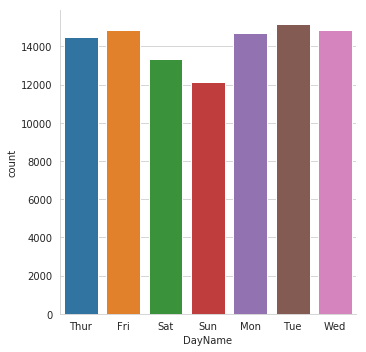

In [15]:
#To see the day of the week that most calls were received

sns.catplot(x='DayName', data=df, kind='count')

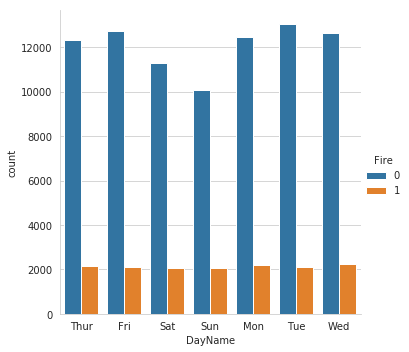

In [16]:
#Add hue as the reason in the above plot

sns.catplot(x='DayName', data=df, kind='count', hue='Fire')

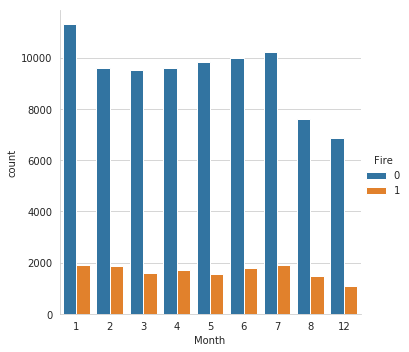

In [23]:
#As seen, cases of traffic are way much more than those of fire

#Now to see the  month that many emergency cases were reported:
sns.catplot(x='Month', data=df, kind='count', hue='Fire')

In [ ]:
#And so on...